<a href="https://colab.research.google.com/github/IamAnindyaSharma/Prod-Projects/blob/main/Cluster_Analysis_Industry_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Bengaluru DIP.xlsx to Bengaluru DIP.xlsx


In [2]:
import pandas as pd

# Replace 'your_file.xlsx' with the uploaded file name
excel_file = list(uploaded.keys())[0]
df_excel = pd.read_excel(excel_file)

# Save the file as CSV
csv_file = 'converted_file.csv'
df_excel.to_csv(csv_file, index=False)

print(f"Excel file converted to CSV: {csv_file}")


Excel file converted to CSV: converted_file.csv


In [3]:
df = pd.read_csv(csv_file)
print("Loaded DataFrame:")
print(df.head())

Loaded DataFrame:
      Locality  Pincode  Average Rate (₹/sq.ft)  Rental Yield (%)
0      Varthur   560087                   14200               2.0
1     Sarjapur   562125                   11300               3.0
2       Gunjur   560087                   10950               NaN
3  Dommasandra   562125                    9250               NaN
4  Tumkur Road   560073                   13300               3.0


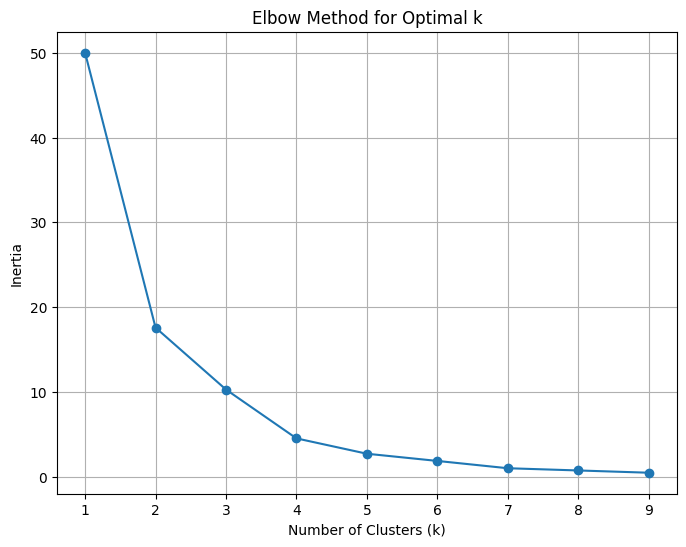

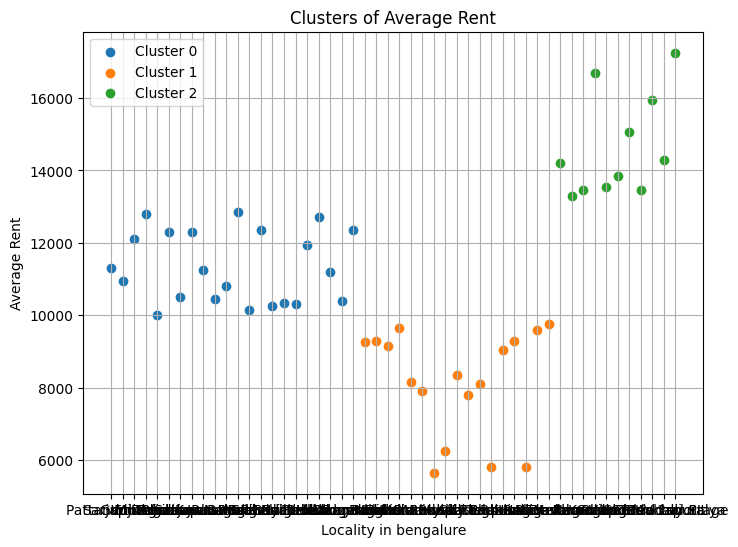

In [6]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select the 'Average Rent' column
rent_data = df[['Average Rate (₹/sq.ft)']]

# Standardize the data
scaler = StandardScaler()
rent_data_scaled = scaler.fit_transform(rent_data)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rent_data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Choose the optimal number of clusters (e.g., 3 from the elbow curve)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(rent_data_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):
    clustered_data = df[df['Cluster'] == cluster]
    plt.scatter(
        clustered_data['Locality'],
        clustered_data['Average Rate (₹/sq.ft)'],
        label=f'Cluster {cluster}',
    )

plt.title('Clusters of Average Rent')
plt.xlabel('Locality in bengalure')
plt.ylabel('Average Rent')
plt.legend()
plt.grid(True)
plt.show()


